<a href="https://colab.research.google.com/github/Shubhampapadkar/Netflix-Movies-and-TV-show-Clustering/blob/main/shubh_Netflix_Movies_and_TV_show_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Netflix Movies and TV show Clustering**

# **Project type** - **Unsupervised Machine Learning**

# **Contribution** - **Team** 

# **Name** -
# **Team member 1 - Amisha Kapse**
# **Team member 2 - Dinesh Jambhulkar**
# **Team member 3 - Renuka Jadhav**
# **Team member 4 - Shubham Papadkar**




# **Project Summary**

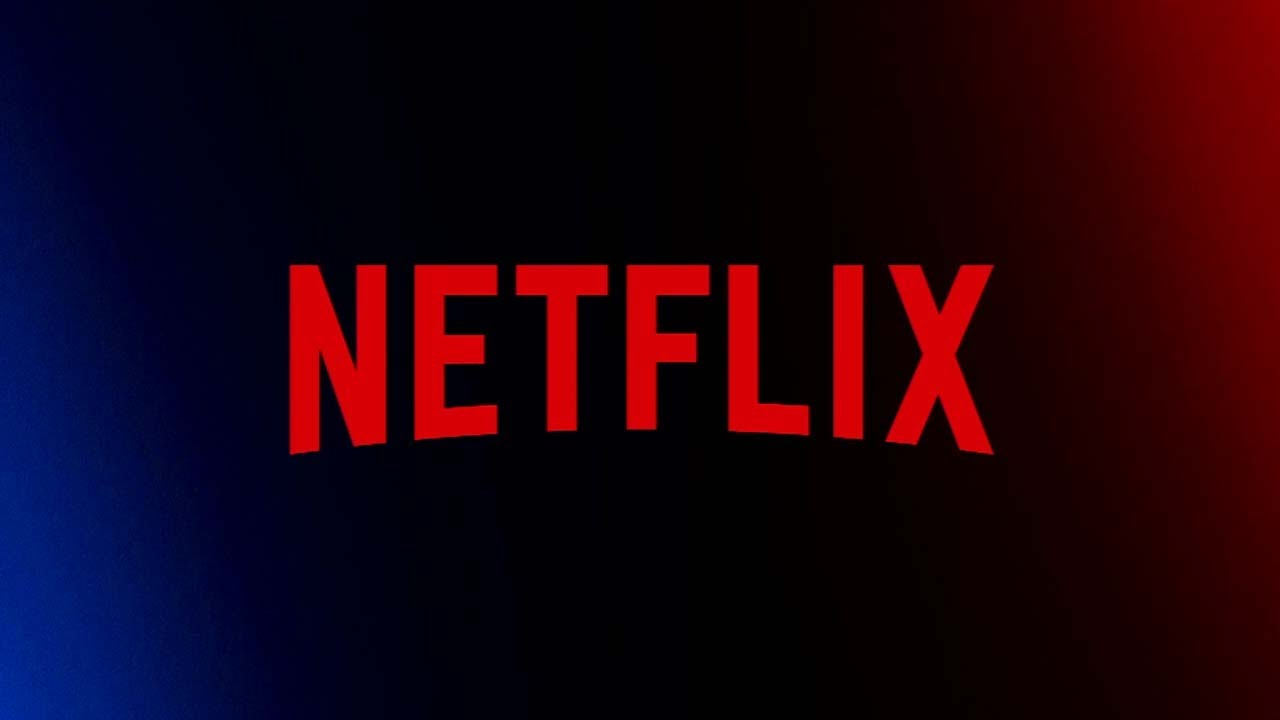

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.



# **Github link** :- https://github.com/Shubhampapadkar/Netflix-Movies-and-TV-show-Clustering

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.




# **Objectives**

Our objective is to conduct an Exploratory Data Analysis to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.

# **Let's Begin**

# **Knowing the Dataset**

In [2]:
# Importing the necessary libraries which is required to perform coding operations.

import numpy as np
import pandas as pd                                                             
import seaborn as sns                                                           
from numpy import math
import matplotlib.pyplot as plt                                                 
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure

import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import datetime 
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
     

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **Loading the Dataset**

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding**



In [4]:
# Reading the CSV (comma seperated value) file by using pandas operation.

netflix_df= pd.read_csv('/content/drive/MyDrive/Data CSV /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **Dataset First and View**

In [5]:
# Let's take a first look at the Netflix Movies and TV show Clustering dataset.

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# **Dataset Rows and Column Count**

In [6]:
# Let's Check the Shape of data.

print(f' We have Total {netflix_df.shape[0]} Rows and {netflix_df.shape[1]} Columns.')

 We have Total 7787 Rows and 12 Columns.


# **Dataset Information**

In [7]:
# Illustrate the Information of dataset.

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Duplicate Values**

In [8]:
# Checking for the duplicate values rows.(True indicates Duplicate values)

netflix_df.duplicated().value_counts()

False    7787
dtype: int64

# Here we shows that there is no duplicate value present in our dastaset.

# **Deal with Null values and Missing values**

In [9]:
# Checking the null values of data.

netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Here we found the 5 feature that is Director,Cast,Country,Date Added and Rating these features contain Null values or Missing data.

Text(0.5, 1.0, ' Visualising Missing Values')

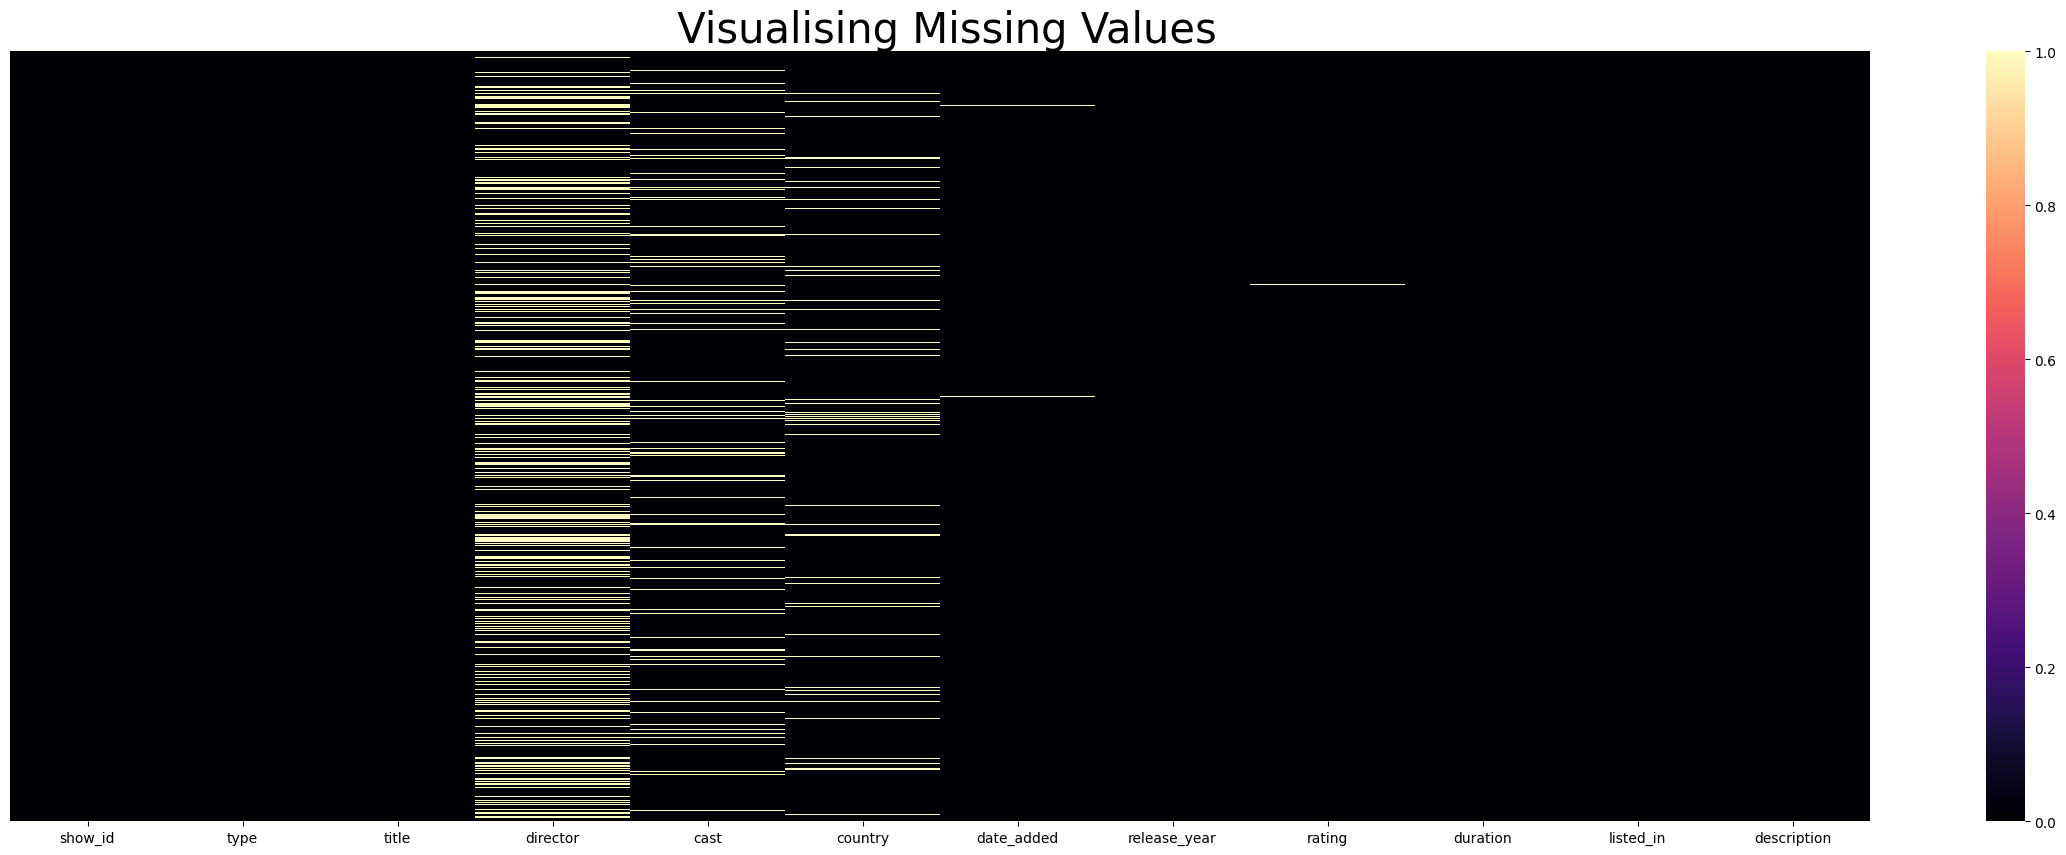

In [10]:
# Visualising Missing values using heatmap.

plt.figure(figsize=(30,10))
sns.heatmap(netflix_df.isnull(),cmap='magma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values",fontsize=30)



# In that dataset this column null value there 1. director=2389,cast =718,country=507,date_added=10,Rating=7.

# **Understanding the Variables**

# **Dataset Columns**


In [11]:
# List of columns present in our dataset.

list(netflix_df.columns)
     

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

# **Dataset Describe**

In [12]:
# Here we describe the dataset which shows aggregated and percentagewise values.

netflix_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Variable Descriptions**

1. **Show  Id** : Unique ID for every Movie / Tv Show

2. **Type** : Identifier - A Movie or TV Show

3. **Title** : Title of the Movie / Tv Show

4. **Director** : Director of the Movie

5. **Cast** : Actors involved in the movie / show

6. **Country** : Country where the movie / show was produced

7. **Date_added** : Date it was added on Netflix

8. **Release year** : Actual Releaseyear of the movie / show

9. **Rating** : TV Rating of the movie / show

10. **Duration** : Total Duration - in minutes or number of seasons

11. **Listed In** : Genere

12. **Description** : The Summary description

# **Unique value of variables and it's  Value counts**

In [13]:
# Check  number of Unique Values for each variable.

for i in netflix_df.columns.tolist():
  print("No. of unique values in ",i,"is",netflix_df[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


In [14]:
netflix_df['type'].value_counts(normalize=True)

Movie      0.69051
TV Show    0.30949
Name: type, dtype: float64

In [15]:
netflix_df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [16]:
# Duration of movie.

netflix_df.duration.value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [17]:
# Genre of shows.

netflix_df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [18]:
netflix_df.director.value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [19]:
netflix_df.cast.value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [20]:
netflix_df.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [21]:
netflix_df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

# **Handling missing values** 

# Here we have 4 features Director , Cast , Country , Date_Added .we fill this missing value as an Unknown. 

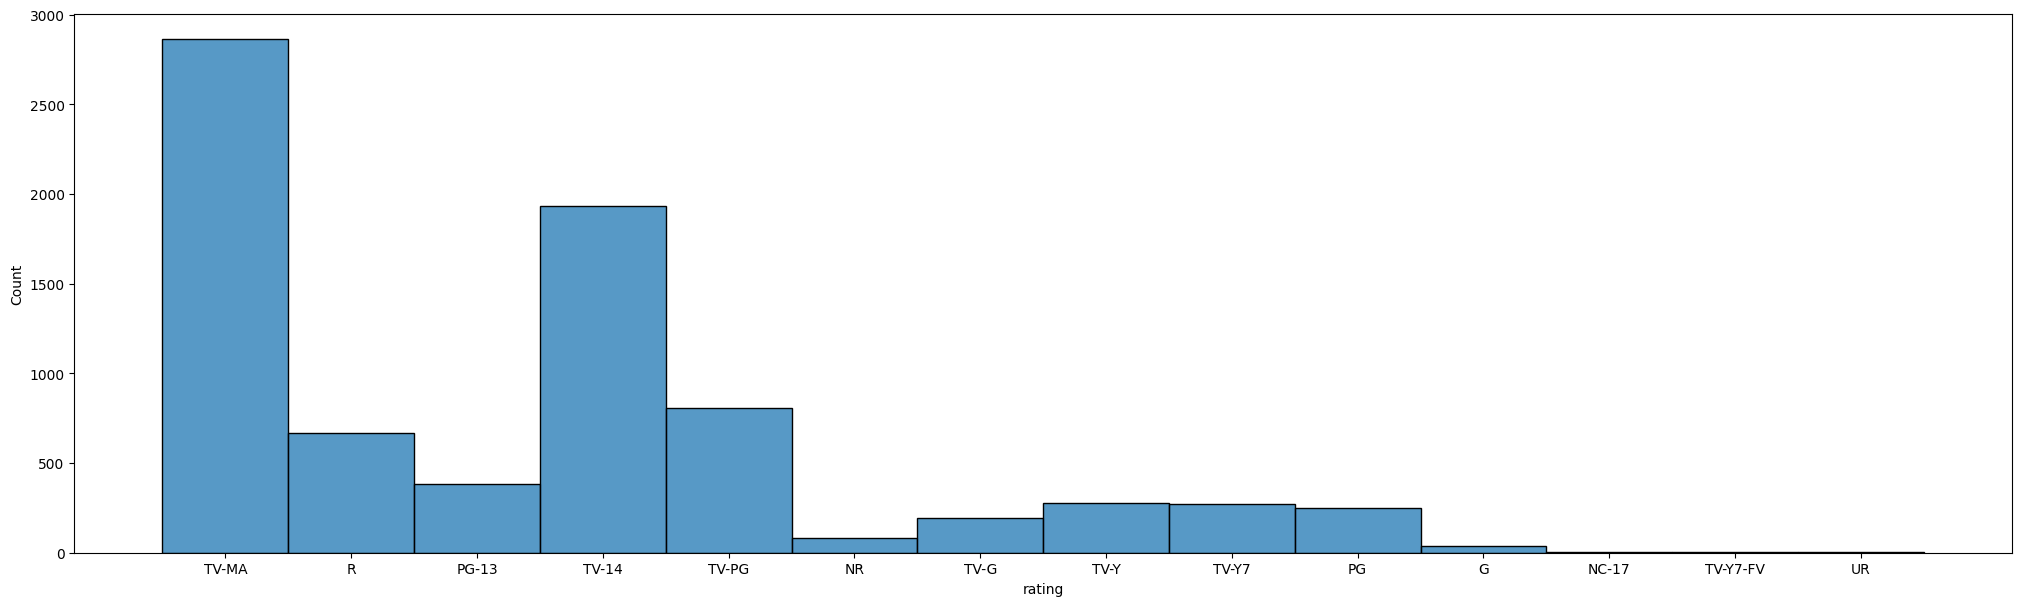

In [22]:
# Visualising the Graphical Representation and Distribution of Rating feature.

plt.figure(figsize=(25, 7))
sns.histplot(data=netflix_df, x = 'rating')
plt.show()

# Here we shows that TV-MA and TV-14 have higher Ratings.

In [23]:
# Replace the null value with unknown.

netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')

# As per Distribution Plot we are replace the missing value of rating feature by using mode Imputation.

netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Drop the Rows who have null values.

netflix_df.dropna(axis=0, inplace = True)

In [24]:
# Final checking of Null Values.

netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [25]:
netflix_df.shape

(7777, 12)

# **Date_added column string to Datetime format**


In [26]:
# Typecasting 'date_added' from string to datetime.

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

In [27]:
# Let us change the data type of pickup_dt to date-time format.

netflix_df['date_added'][:5]

0   2020-08-14
1   2016-12-23
2   2018-12-20
3   2017-11-16
4   2020-01-01
Name: date_added, dtype: datetime64[ns]

In [28]:
# Creating New features Month_Added and Year_Added.

netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [29]:
netflix_df.shape

(7777, 14)

# **Checking of dataset information after creating new variables.**

In [30]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  month_added   7777 non-null   int64         
 13  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 911.4+ KB


# **Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

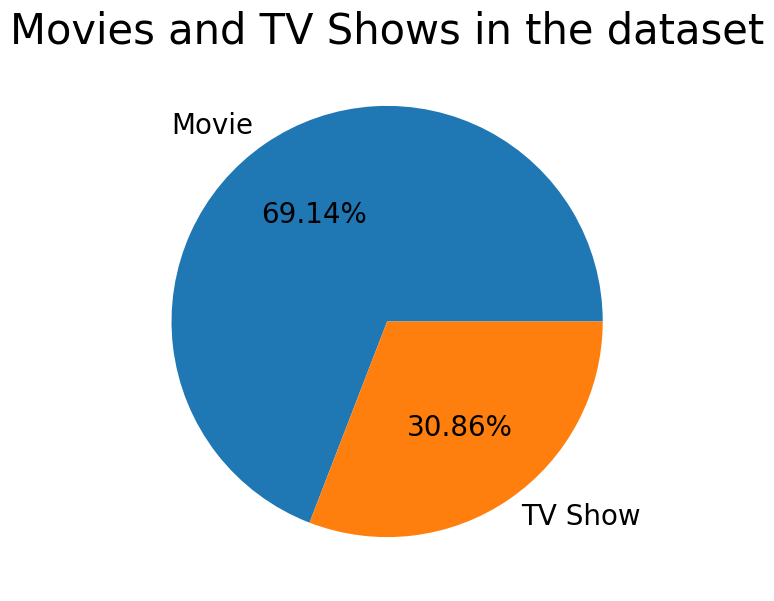

In [31]:
# Number of Movies and TV Shows in the dataset.

plt.figure(figsize=(7,7))
netflix_df.type.value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize=20)
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset',fontsize=30)

# In this pie plot there are more movies 69.14% than TV shows 30.86% in the dataset.
# It shows movies are more favourable rather than Tv show.

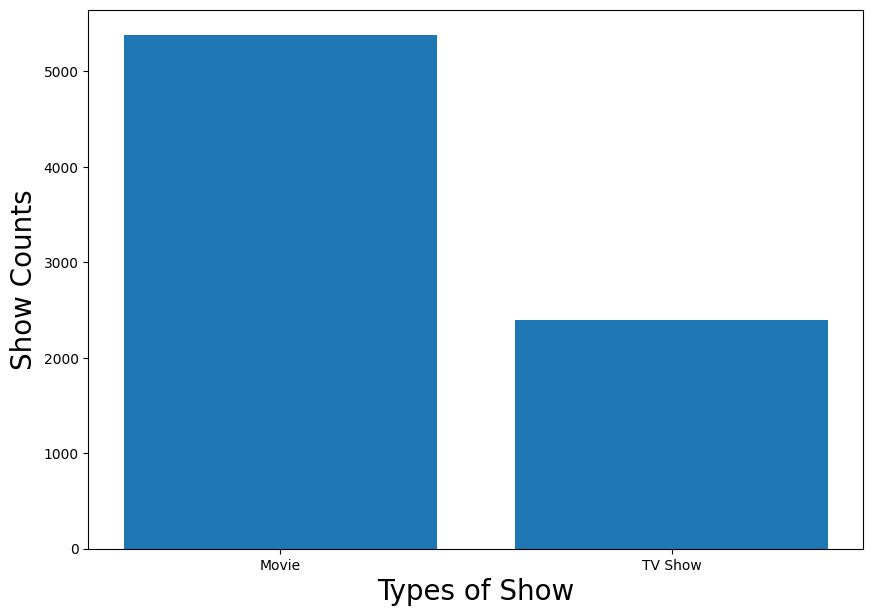

In [32]:
# Bar plot Representation of on type of shows.

plt.figure(figsize=(10, 7))
plt.bar(netflix_df.groupby('type')['type'].count().index, netflix_df.groupby('type')['type'].count())
plt.xlabel('Types of Show',fontsize=20)
plt.ylabel('Show Counts',fontsize=20)
plt.show()

# Here we shows that the count of Movie is greater than TV show.

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

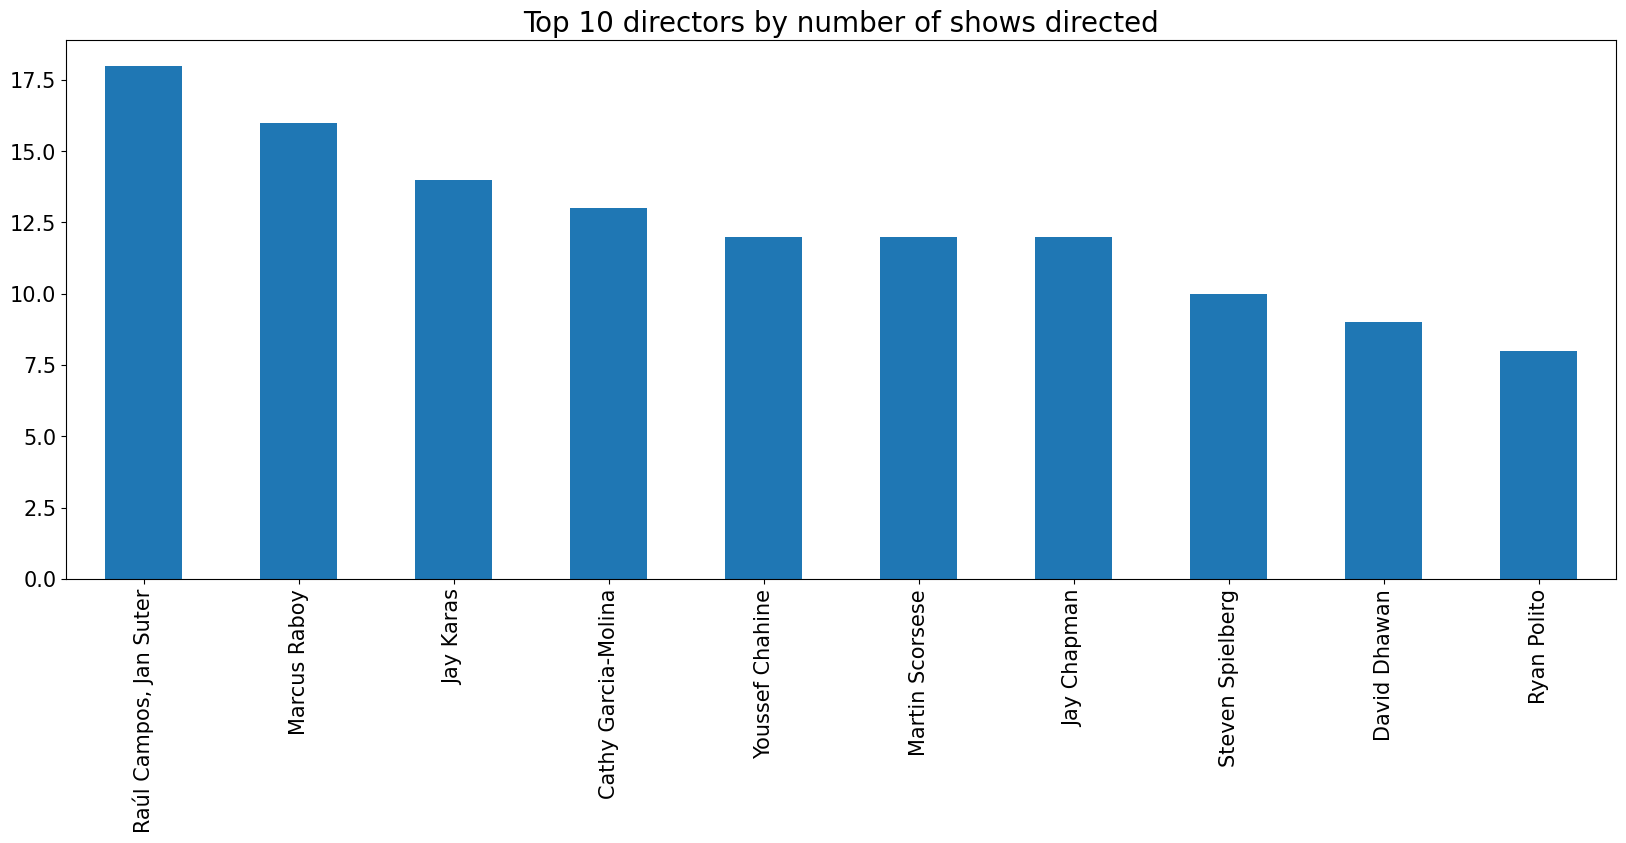

In [33]:
# Top 10 directors in the dataset.

plt.figure(figsize=(20,7))
netflix_df[~(netflix_df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar',fontsize=15)
plt.title('Top 10 directors by number of shows directed',fontsize=20)

#In this graph which shows that top 10 Directors who direct most of the shows.

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

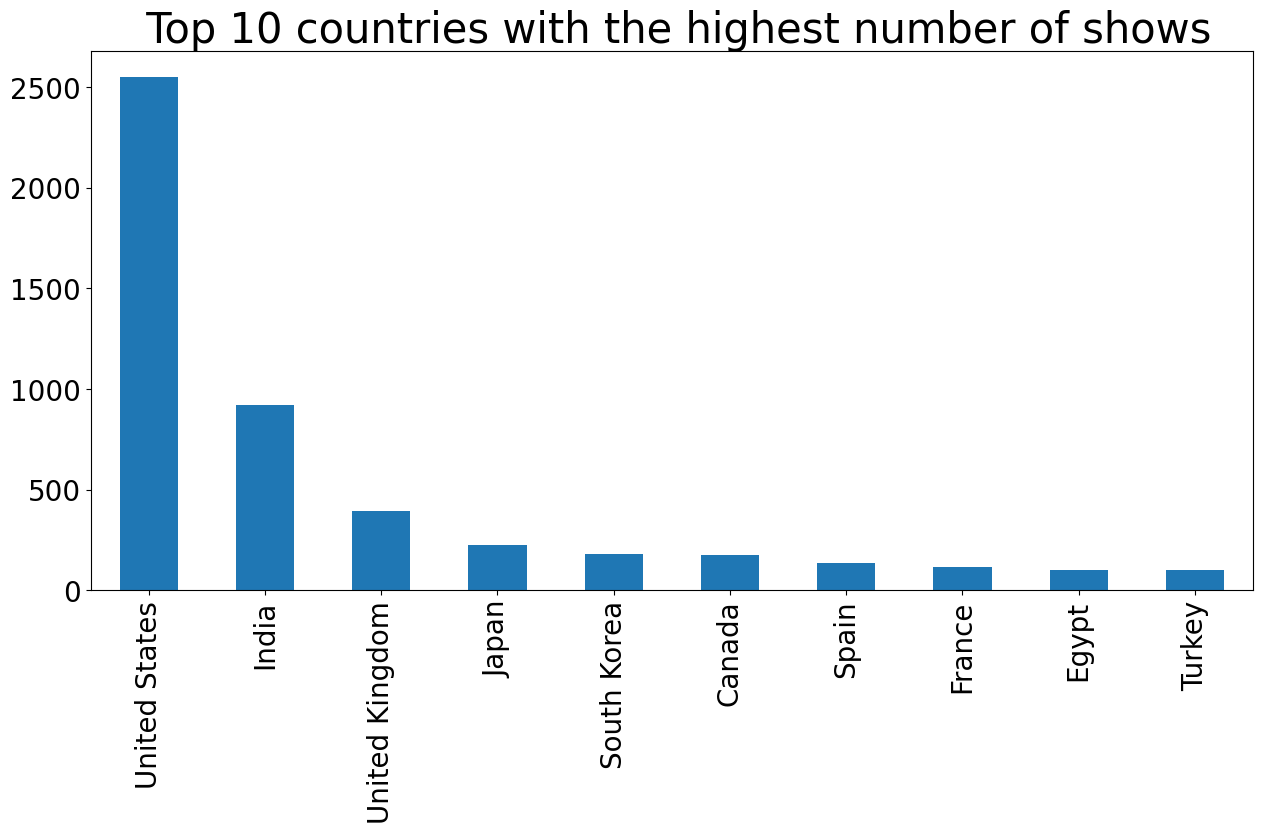

In [34]:
# Top 10 countries with the highest number movies / TV shows in the dataset.

plt.figure(figsize=(15,7))
netflix_df[~(netflix_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar',fontsize=20)
plt.title(' Top 10 countries with the highest number of shows',fontsize=30)

# In this Bar graph shows that top 10 countries with their highest number of shows.out of which shows that the United States stands for top rank.

Text(0, 0.5, 'Count')

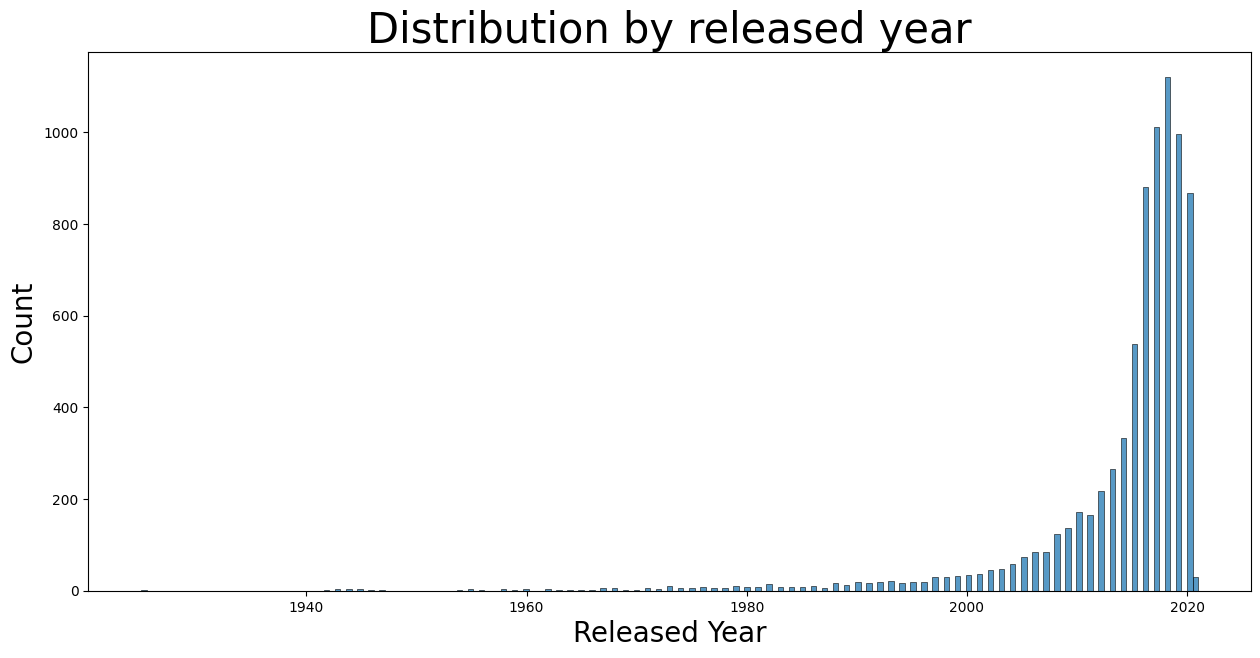

In [35]:
# Visualizing the year in which the movie and tv show was released.

plt.figure(figsize=(15,7))
sns.histplot(netflix_df['release_year'])
plt.title('Distribution by released year',fontsize=30)
plt.xlabel("Released Year",fontsize = 20)
plt.ylabel("Count",fontsize = 20)

# From this Histogram it shows that year from 2000 to 2020 more number of Movie and TV shows released because of increasing the popularity .

Text(0, 0.5, 'Count')

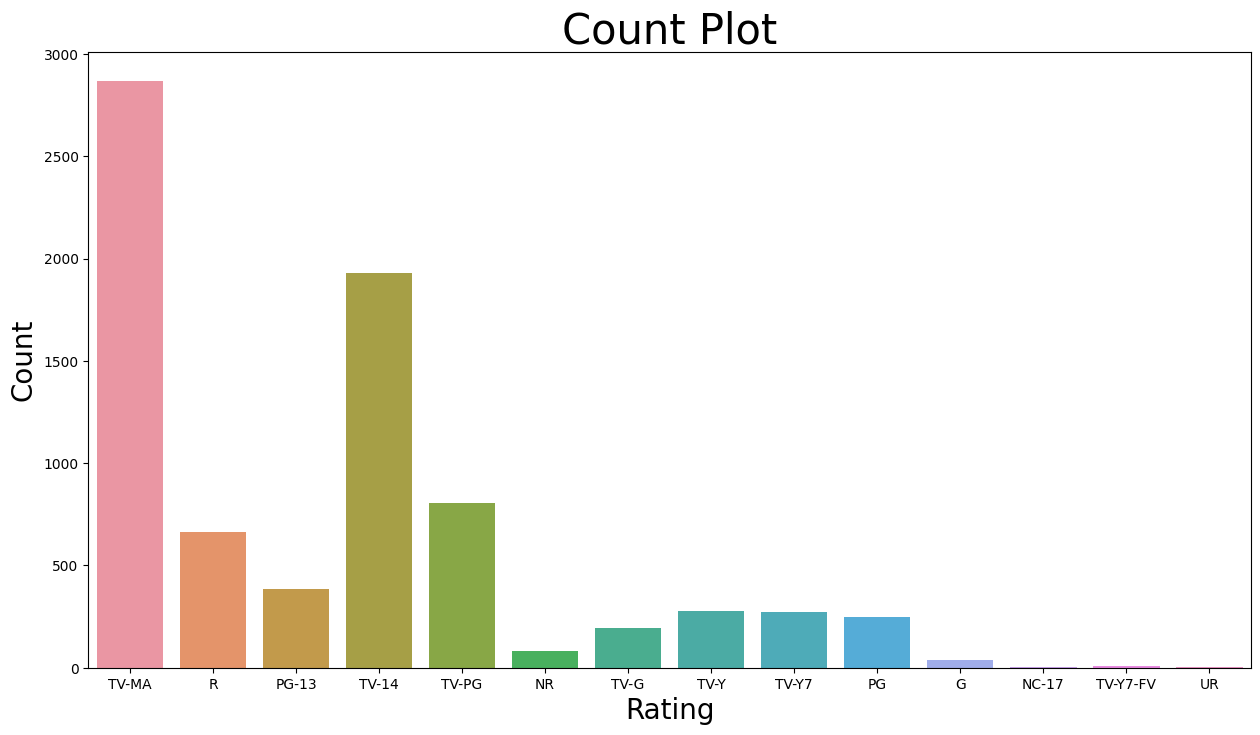

In [36]:
# Ratings for shows in the dataset.

plt.figure(figsize=(15,8))
sns.countplot(x='rating',data=netflix_df)
plt.title("Count Plot",fontsize =30)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Count',fontsize=20)
     

 # In this plot we found all rating count. TV-MA is the highest rating and second highest is TV-14 and third highest is TV-PG rating.

Text(0, 0.5, 'Count')

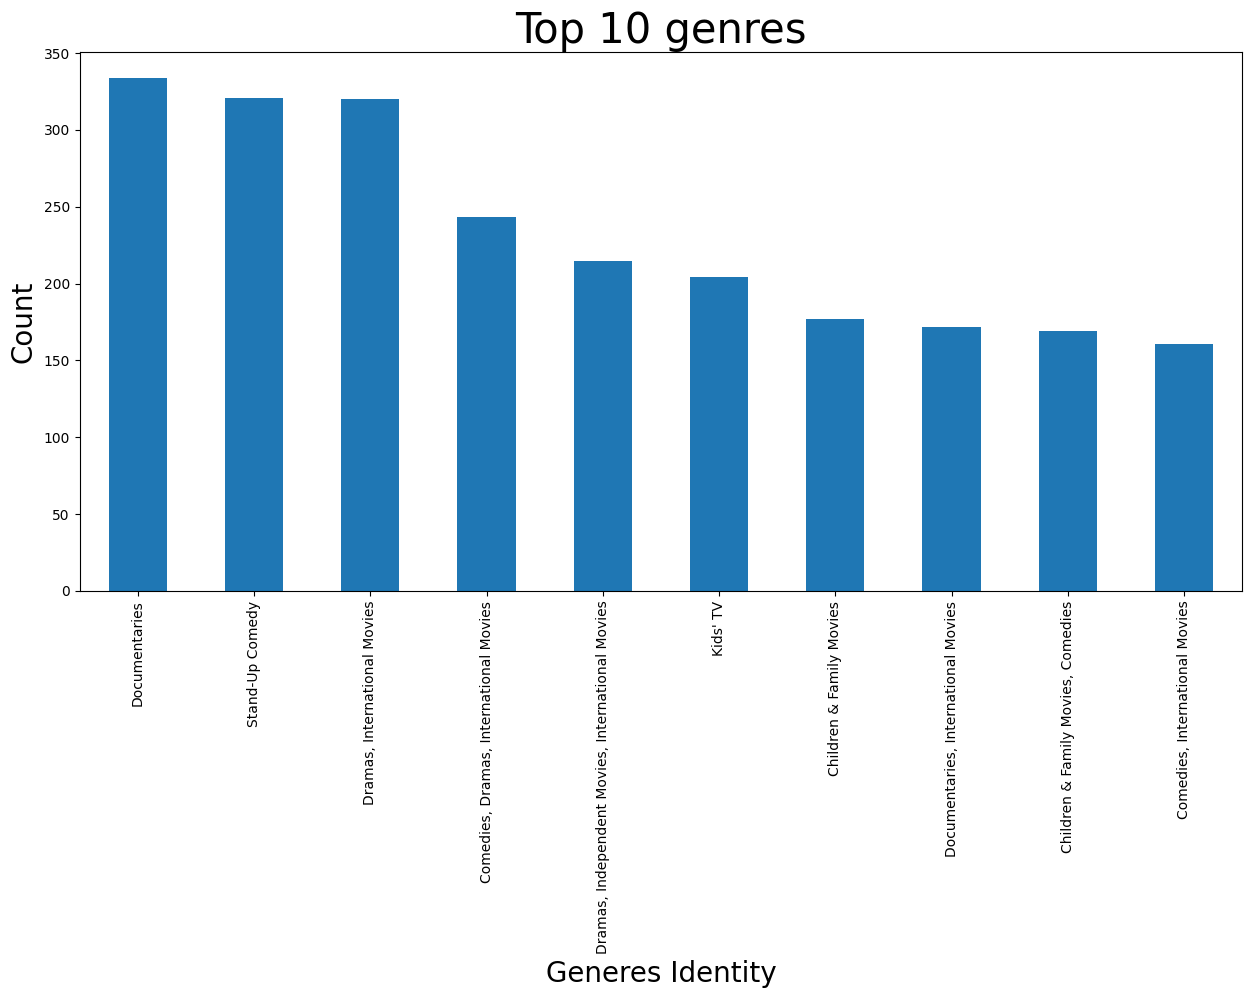

In [37]:
# Top 10 genres.

plt.figure(figsize=(15,7))
netflix_df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres',fontsize=30)
plt.xlabel('Generes Identity',fontsize=20)
plt.ylabel('Count',fontsize=20)

## Here we shows Top 10 Generes ,In this bar plot we found  that Dramas are large amount of shows and movies while Comedies are the second large amount of shows and Movies.

Text(0, 0.5, 'Count')

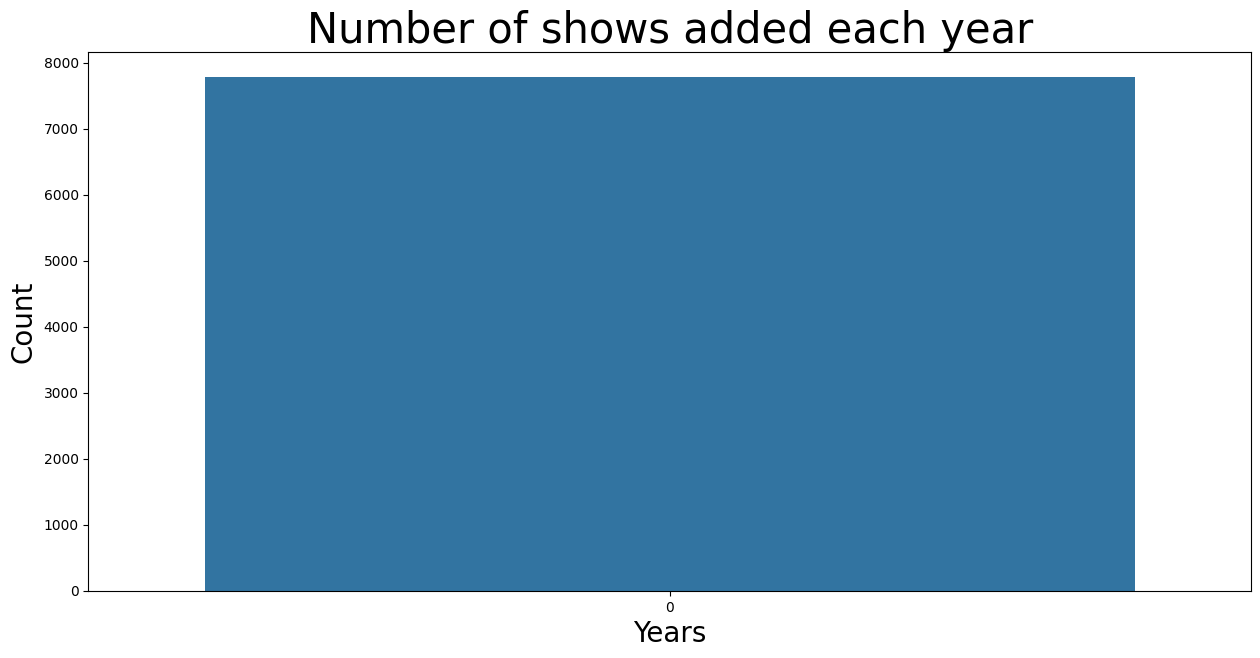

In [38]:
# Number of shows added over the years.

plt.figure(figsize = (15,7))
sns.countplot(netflix_df['year_added'])
plt.title('Number of shows added each year',fontsize=30)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Count',fontsize=20)

## From this graph it shows that after 2015 the popularity of Netflix is increasing hugely.The impact of this that the more number of shows are added on after 2015.
## out of which 2019 year have maximum number of shows added,this is the top most highest year along with 2020 and 2018.


Text(0, 0.5, 'Count')

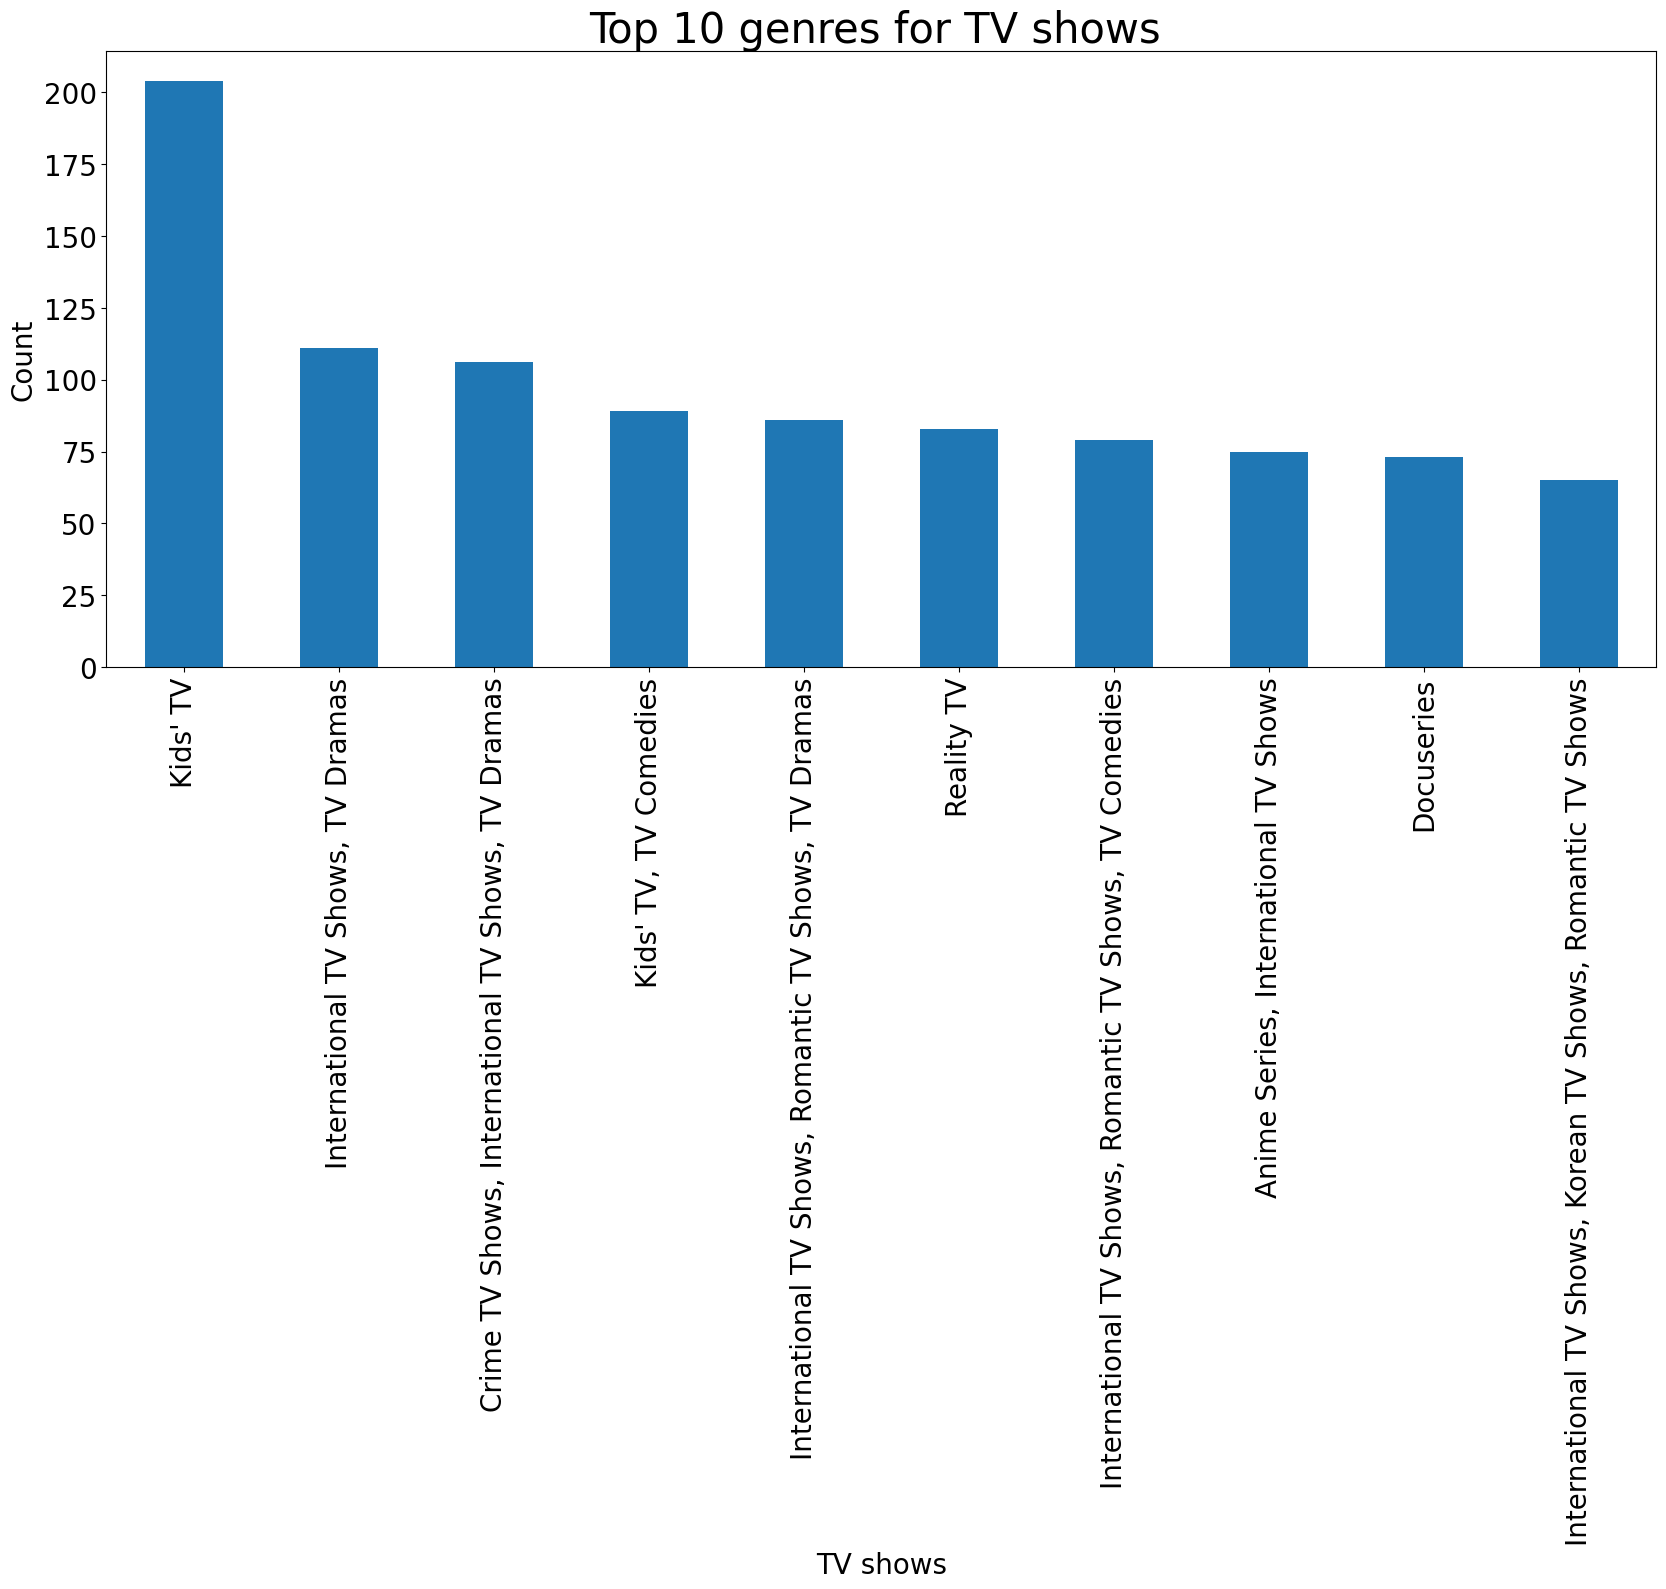

In [39]:
# Top 10 genre for TV shows.

plt.figure(figsize=(20,8))
netflix_df[netflix_df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar',fontsize=20)
plt.title('Top 10 genres for TV shows ',fontsize=30)
plt.xlabel('TV shows',fontsize=20)
plt.ylabel('Count',fontsize=20)

## This graph Shows that top 10 Tv shows in which most of the top count of TV shows belongs to kids Category.

Text(0, 0.5, 'Count')

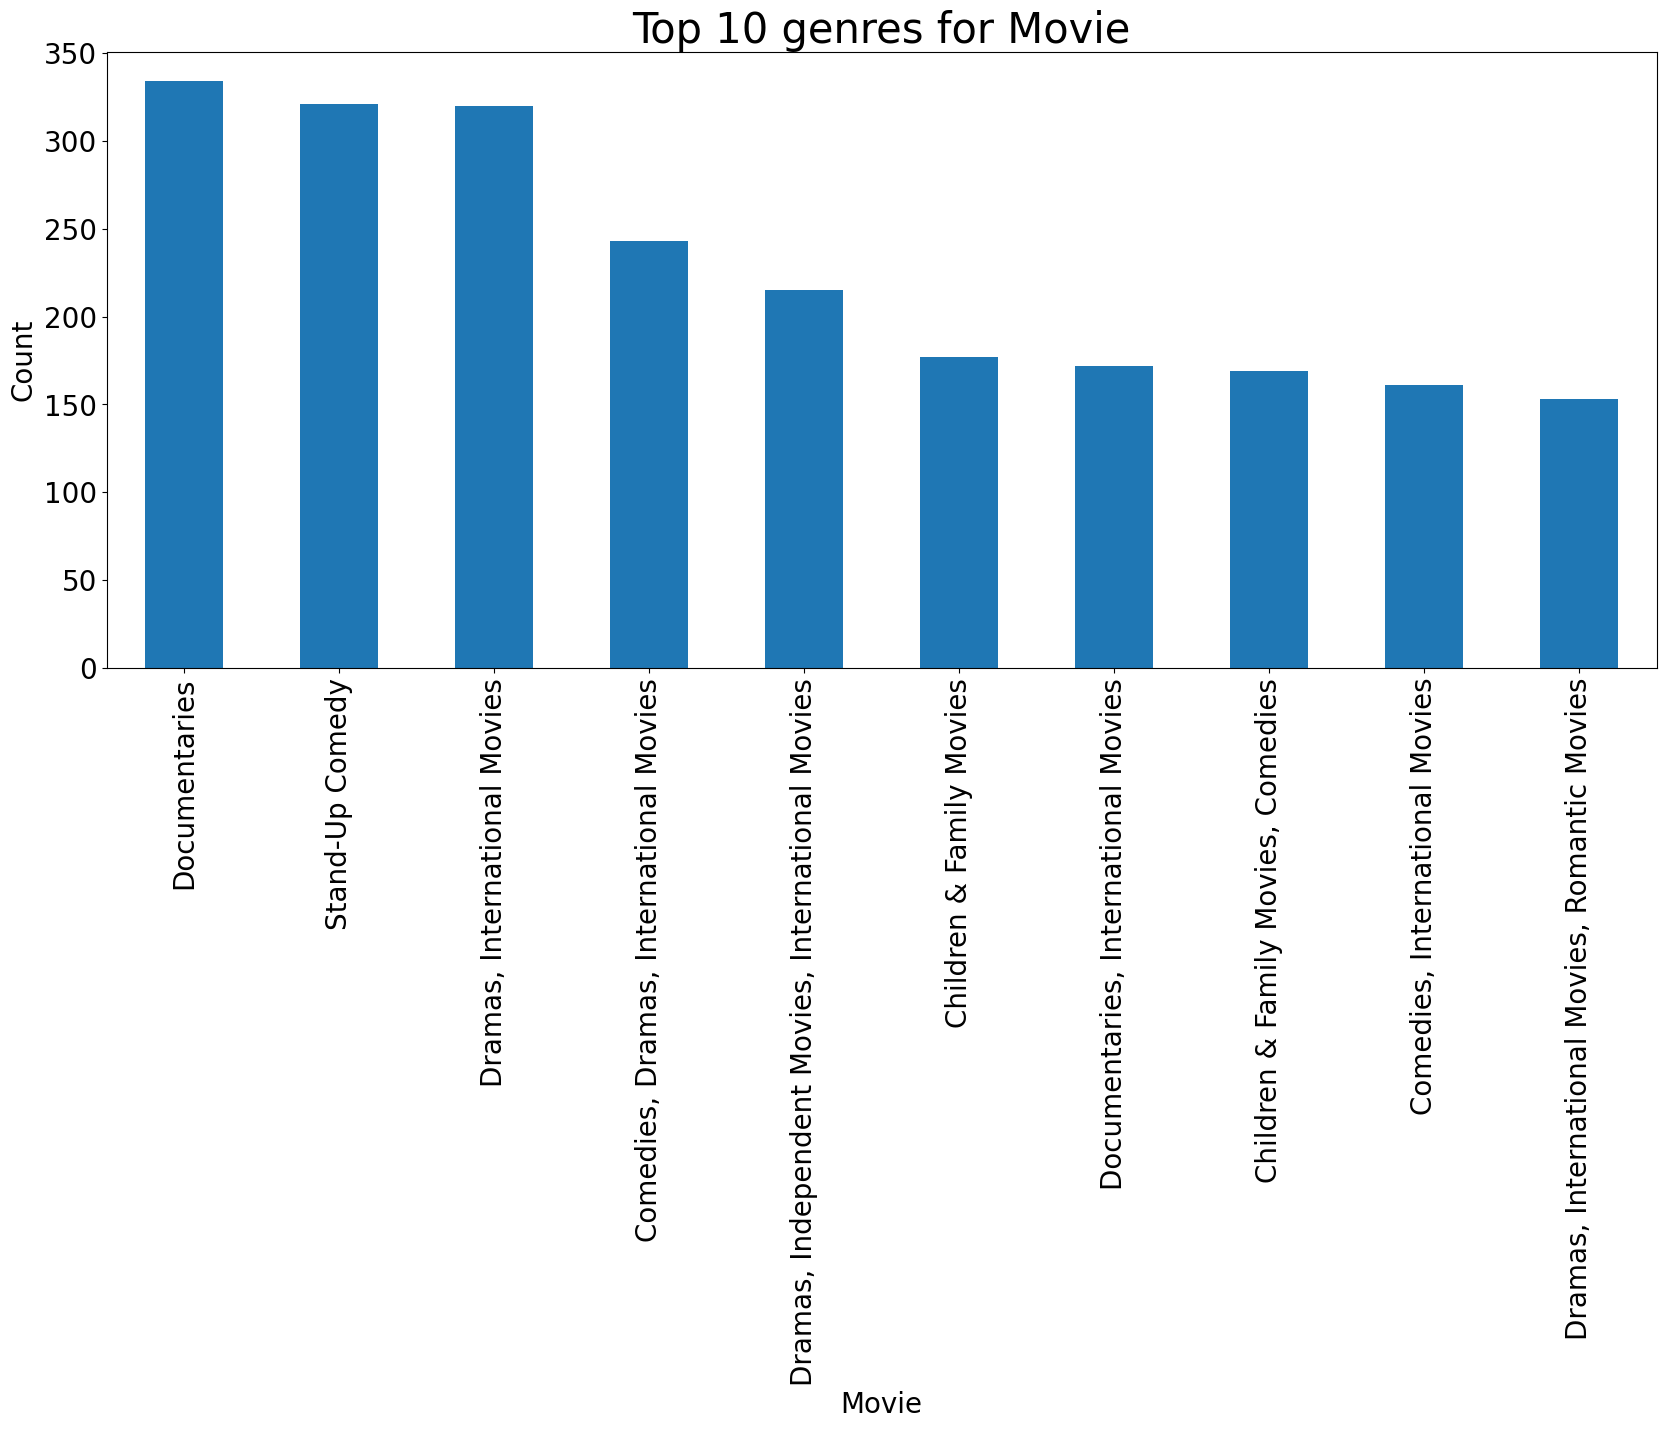

In [40]:
# Top 10 genre for Movies.

plt.figure(figsize=(20,8))
netflix_df[netflix_df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='bar',fontsize=20)
plt.title('Top 10 genres for Movie',fontsize=30)
plt.xlabel('Movie',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [41]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'year_added'],
      dtype='object')

In [42]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  month_added   7777 non-null   int64         
 13  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.1+ MB


# **Outlier detection**

# Here we shows that thers is only 1 feature which is in numerical form ,so we are find out outliers for only this feature. 

Text(0.5, 0, 'Release year')

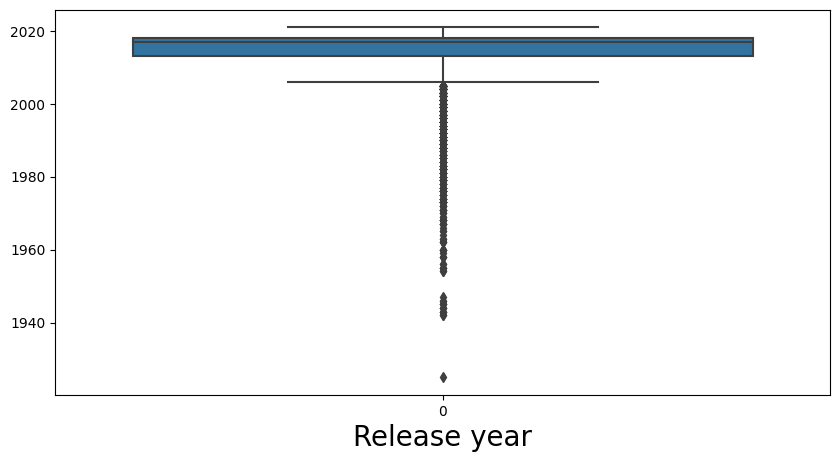

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(netflix_df.release_year)
plt.xlabel("Release year",fontsize=20)

# Here we shows that before in the period of 90's there was no popularity of netflix due to that less amount of show generated so that these year's is consider as an outlier.

In [44]:
# Using Inter-Quartile Range finding out the outliers.

release_year_Q1 = netflix_df.release_year.quantile(0.25)
release_year_Q3 = netflix_df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1

print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [45]:
# Treating outliers.

release_year = netflix_df[(netflix_df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( netflix_df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ] 

In [46]:
netflix_df["release_year"] = np.where(netflix_df["release_year"] <2009, netflix_df.release_year.mean(),netflix_df['release_year'])
     

<Axes: >

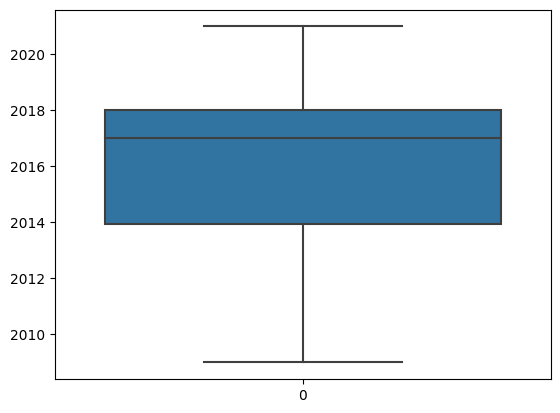

In [47]:
# Data visualization of 'release_year' using Boxplot.

sns.boxplot(netflix_df.release_year)

 # Here we successfully removed the outliers present in Release year.

# **Now start wih Unsupervised Machine Learning clustering algorithms**

# **1.K-Means Clustering:** For performing this algortihm we have to carried out various Dimension reduction technics using Principal component analysis along with Natural Language processing.


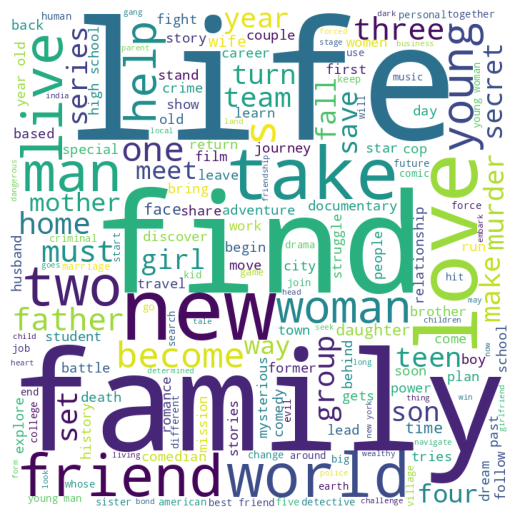

In [48]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in netflix_df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [49]:
Dataset = netflix_df.copy()

In [50]:
Dataset.fillna('',inplace=True)

In [51]:
# Combining all the clustering attributes into a single column

Dataset['clustering'] = (Dataset['director'] + ' ' + 
                                Dataset['cast'] +' ' + 
                                Dataset['country'] +' ' + 
                                Dataset['listed_in'] +' ' + 
                                Dataset['description'])

# Here we use 100 number of rows from our dataset for clustering purpose.

In [52]:
Dataset['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies, Dramas, International Movies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

# **Removing Punctuation**

In [53]:
# function to remove punctuations.

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)

# return the text stripped of punctuation marks.

    return text.translate(translator)

In [54]:
# Removing punctuation marks.

Dataset['clustering'] = Dataset['clustering'].apply(remove_punctuation)

In [55]:
# Select the 100 number of clusters for the dataset.

Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies Dramas International Movies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# In this process removed the all Puncutation marks.

# **Removing non-ASCII characters:**

In [56]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [57]:
# Remove non-ascii characters.

Dataset['clustering'] = remove_non_ascii(Dataset['clustering'])

In [58]:
# Select the 100 number of clusters for the dataset.

Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies Dramas International Movies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

In [59]:
# Extracting the stopwords from nltk library.

import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')

# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

# Here we shows the list of stopwords which we have to remove for further Process.

In [60]:
def remove_stopwords(text):
    
# removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]

    # joining the list of words with space separator
    return " ".join(text)

In [61]:
# Removing stop words.

Dataset['clustering'] = Dataset['clustering'].apply(remove_stopwords)

In [62]:
# Select the 100 number of clusters for the dataset.

print(Dataset['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


# Here we successfully removed the stopwords by using Natural Language Tool-kit

# **Removing Lammetization**

In [63]:
# function to lemmatize the corpus.

def lemmatize_verbs(words):
   
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [64]:
# Lemmatization

Dataset['clustering'] = lemmatize_verbs(Dataset['clustering'])

In [65]:
# Select the 100 number of clusters for the dataset.

print(Dataset['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


 # Lemmatization is the process of converting a word to its base form or root form so that it can be analyzed and understood more easily by Natural Language Processing (NLP) systems.

# **Tokenization** 

In [66]:
# Create a reference variable for Class TweetTokenizer.

tokenizer = TweetTokenizer()

In [67]:
# Create text column based on dataset.

Dataset['clustering'] = Dataset['clustering'].apply(lambda x: tokenizer.tokenize(x))

In [68]:
# Select the 100 number of Tokenization for the dataset.
print(Dataset['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'dramas', 'international', 'movies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


# In Tokenization the process of breaking down a text into individual units, called tokens, which typically correspond to words or punctuation marks.

# **Vectorization**

In [69]:
# clustering tokens saved in a variable.

clustering_vectorization = Dataset['clustering']

In [70]:
from nltk.tokenize import TweetTokenizer

In [71]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 7000)    
x = tfidf.fit_transform(clustering_vectorization)

In [72]:
# Dataset Rows & Columns count.

x.shape

(7777, 7000)

In [73]:
# convert X into array form for clustering.
X = x.toarray()

In [74]:
# Check the matrix
X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.2844446, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

# **Reducing Dimensionality using PCA**

In [75]:
# using PCA to reduce dimensionality.

pca = PCA(random_state=7)
pca.fit(X)

PCA(random_state=7)

Text(0, 0.5, 'cumulative explained variance')

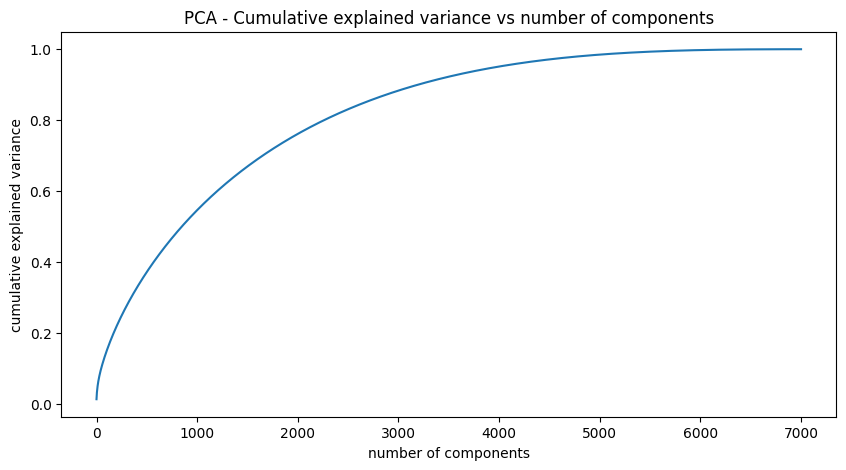

In [76]:
# Explained variance for different number of components.

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [77]:
# Reducing the dimensions to 3500 using pca.

pca = PCA(n_components=3500,random_state=7)
pca.fit(X)

PCA(n_components=3500, random_state=7)

In [78]:
# transformed features.

x_pca = pca.transform(X)

In [79]:
# shape of transformed vectors.

x_pca.shape

(7777, 3500)

 # **K-Means Clustering**

Text(0, 0.5, 'WCSS')

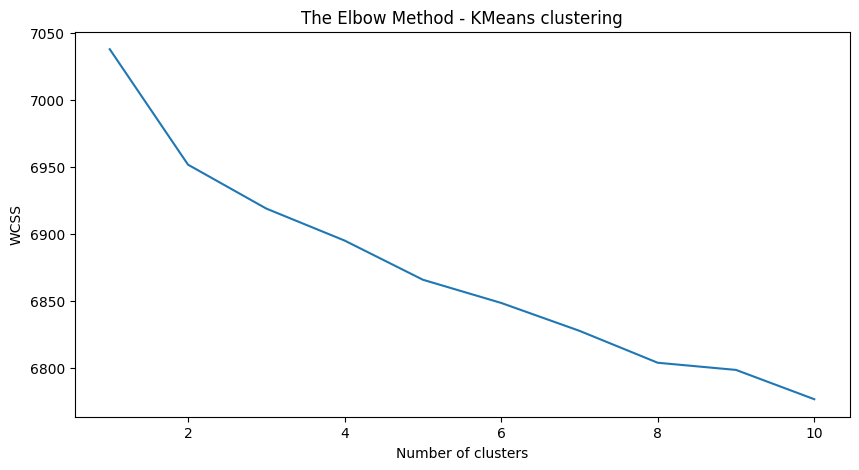

In [80]:
# Elbow method to find the optimal value of k.
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=7)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

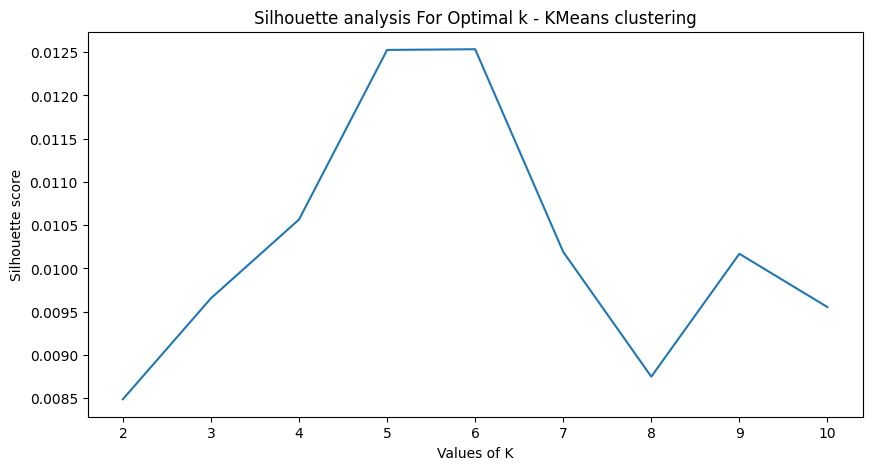

In [81]:
# Plotting Silhouette score for different number of clusters.

range_n_clusters = range(2,11)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=7)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [82]:
# Clustering the data into 6 clusters.

kmeans = KMeans(n_clusters=6,init='k-means++',random_state=7)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=7)

In [83]:
# Adding k kmeans cluster number attribute.

Dataset['kmeans_cluster'] = kmeans.labels_

In [84]:
# Evaluation metrics - distortion, Silhouette score.

kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6848.782549411818, 0.012534834473169266)


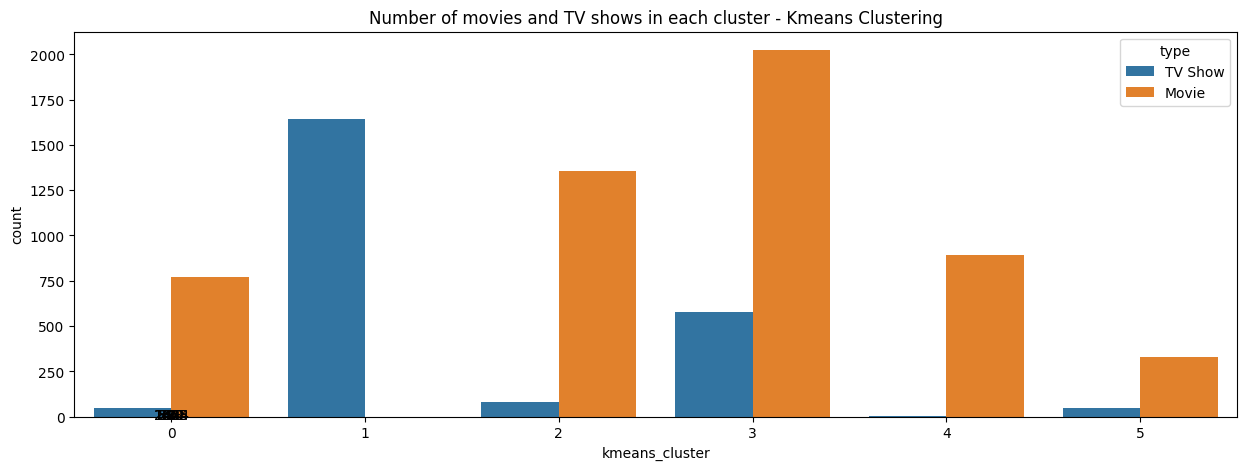

In [85]:
# Number of movies and tv shows in each cluster.

plt.figure(figsize=(15,5))
q = sns.countplot(x='kmeans_cluster',data=Dataset, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10))

In [86]:
# Building a wordcloud for the movie descriptions.

def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

# iterate through the csv file
  for val in Dataset[Dataset['kmeans_cluster']==cluster_num].description.values:
      
# typecaste each val to string
      val = str(val)

# split the value
      tokens = val.split()
      
# Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)

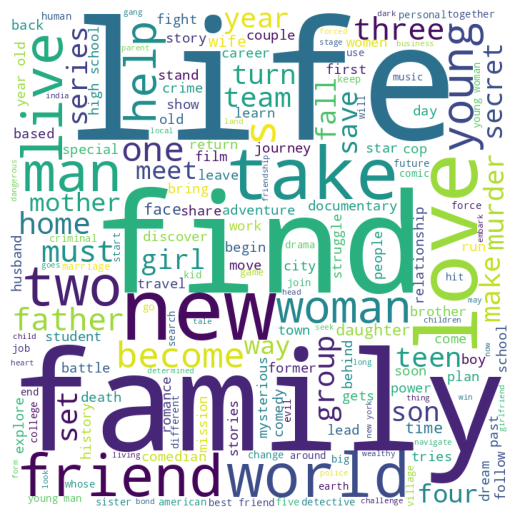

In [87]:
plt.figure(figsize = (20,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

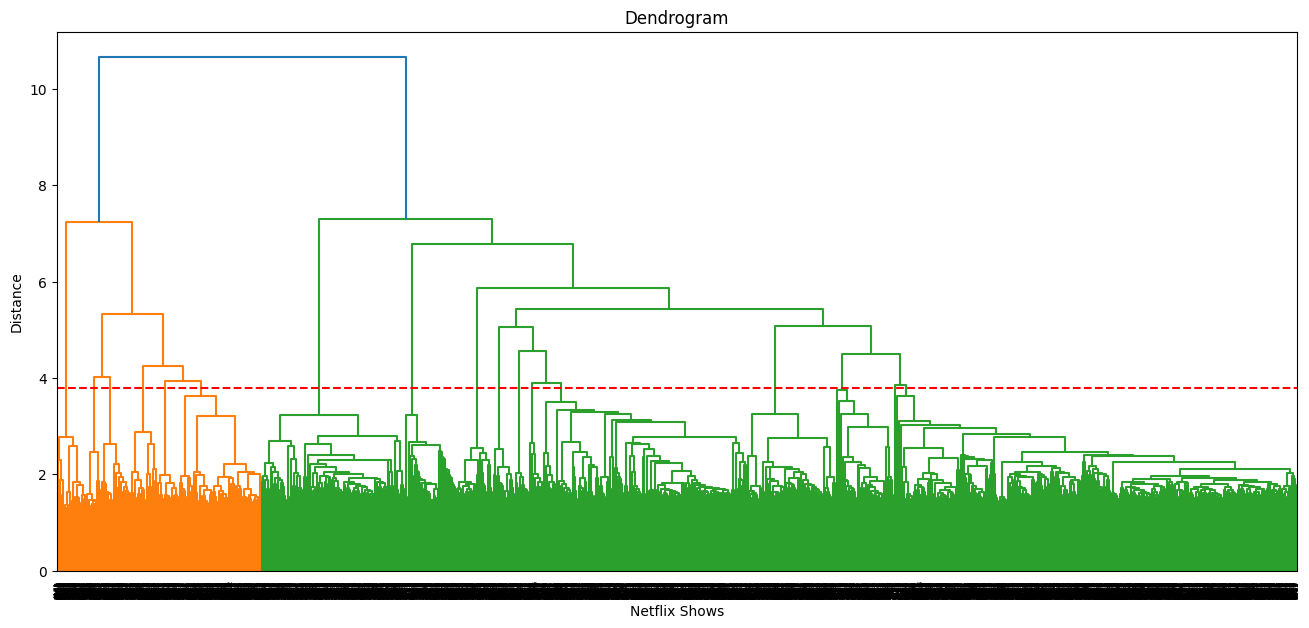

In [88]:
# Building a dendogram to decide on the number of clusters.

plt.figure(figsize=(16, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [89]:
# Fitting hierarchical clustering model.

hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([0, 2, 0, ..., 8, 0, 8])

In [90]:
# Adding a kmeans cluster number attribute
Dataset['hierarchical_cluster'] = hierarchical.labels_

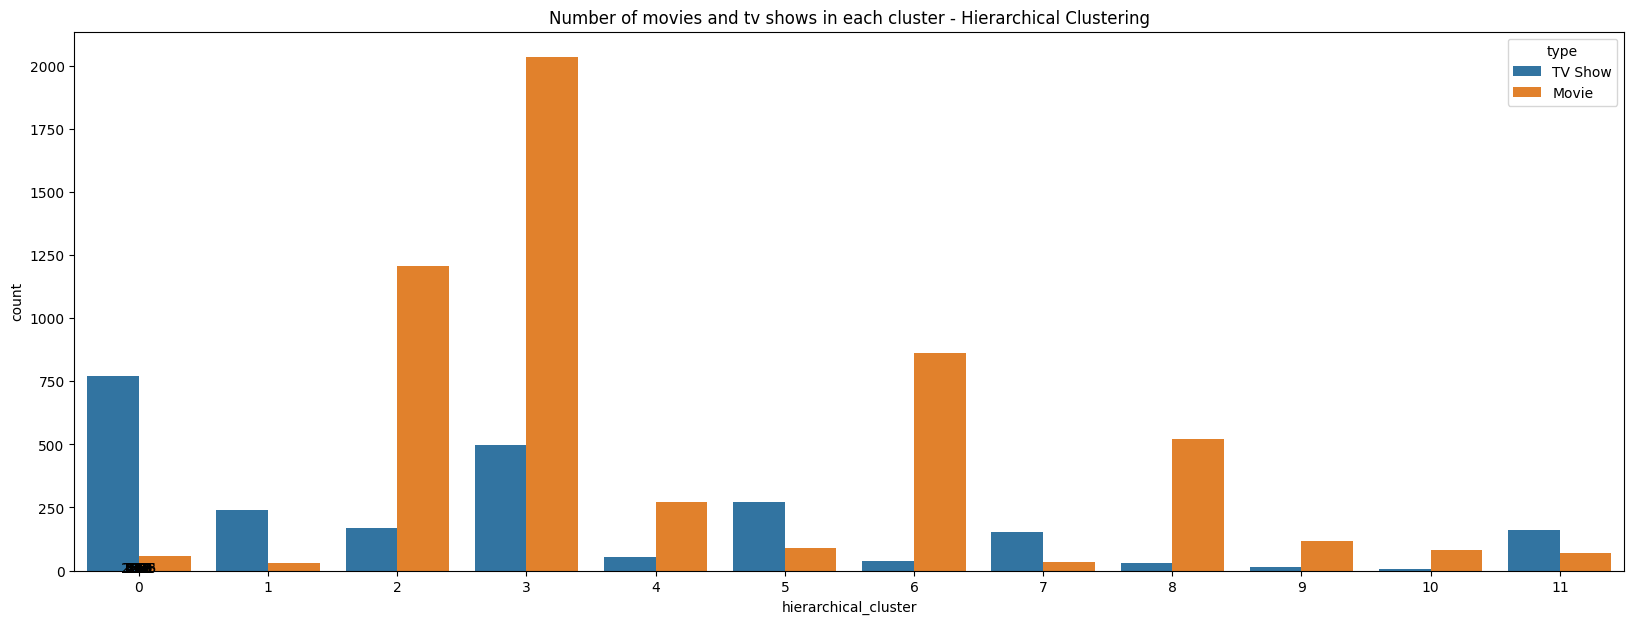

In [91]:
# Number of movies and tv shows in each cluster.

plt.figure(figsize=(20,7))
q = sns.countplot(x='hierarchical_cluster',data=Dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10))

In [92]:
# Building a wordcloud for the movie descriptions.

def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in Dataset[Dataset['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

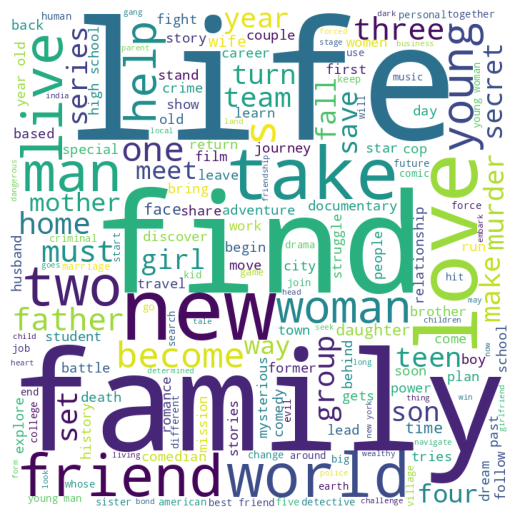

In [93]:
  # plot the WordCloud image.
                       
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

 # **Using Content based Recommendation System**

In [94]:
# Changing the index of the df from show id to show title.

Dataset['show_id'] = Dataset.index

In [95]:
# converting tokens to string.

def convert(lst):
  return ' '.join(lst)

Dataset['clustering'] = Dataset['clustering'].apply(lambda x: convert(x))

In [96]:
# setting title of movies/Tv shows as index
Dataset.set_index('title',inplace=True)

In [97]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(Dataset['clustering'])

In [98]:
# Cosine similarity

cosine_similarity = cosine_similarity(converted_matrix)

In [99]:
# Dataset Rows & Columns count

cosine_similarity.shape

(7777, 7777)

In [100]:
# Developing a function to get 10 recommendations for a show.

indices = pd.Series(Dataset.index)

def Dataset_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(Dataset.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [101]:
# Recommendations for 'A Man Called God'.

Dataset_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Little Baby',
 'My Mister',
 'Extracurricular',
 'Miss Panda & Mr. Hedgehog',
 'Chef & My Fridge',
 'Busted!']

In [102]:
# Recommendations for 'Peaky Blinders'.

Dataset_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'London Spy',
 'Giri / Haji',
 'The Murder Detectives',
 'My Hotter Half',
 'I AM A KILLER: RELEASED']

In [103]:
# Recommendations for 'Stranger Things'.

Dataset_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Prank Encounters',
 'The Umbrella Academy',
 'Haunted',
 'Zombie Dumb',
 'Warrior Nun',
 'Scream',
 'Nightflyers',
 'Kiss Me First',
 'The Vampire Diaries']

 # **Conclusion**

 

 1. In this project working on clustering problem where we grouped the shows into clusters which is similiar to each other and the shows in different clusters are dissimilar to each other.

 2.The dataset contained about 7787 records, and 12 attributes. We dealed with the dataset's missing values and also perform Exploratory data analysis (EDA).

 3.It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States.

 4.After completion of the EDA, we start with Data Pre-processing the text data by removing the punctuation,stop words,Lemmitizzation,Tokenization etc. This filtered data is passed through TF - IDF Vectorizer since we are conduct a text-based clustering model ,needs the data to be vectorized in order to predict the desired results.

 6.We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

7.Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

8. In a content based recommendation system we used cosine similiarity for finding out top 10 recommendation based on the type of show watched by user.